In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
#import master dataset
master_df=pd.read_csv(r'resources/master_df.csv')
display(master_df)                     

,usstate,county,city,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,State Code,County Code,AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,49.0,0.040,9.0,2.2,4,13,101
1,Arizona,Maricopa,Scottsdale,2000-01-01,102.0,0.039,2.0,1.3,4,13,101
2,Arizona,Maricopa,Phoenix,2000-01-02,36.0,0.032,3.0,2.3,4,13,78
3,Arizona,Maricopa,Scottsdale,2000-01-02,79.0,0.027,2.0,1.3,4,13,78
4,Arizona,Maricopa,Phoenix,2000-01-03,51.0,0.016,11.0,2.5,4,13,114
...,...,...,...,...,...,...,...,...,...,...,...
361257,New York,Queens,New York,2009-12-27,41.0,0.030,12.3,0.0,36,81,39
361258,New York,Queens,New York,2009-12-28,45.0,0.018,11.9,0.0,36,81,49
361259,New York,Queens,New York,2009-12-29,21.0,0.029,6.2,0.0,36,81,49
361260,New York,Queens,New York,2009-12-30,42.0,0.013,13.1,0.0,36,81,48


In [3]:
master_df= master_df.rename(columns={'State Code':'state_code', 'County Code':'county_code'})
display(master_df)

,usstate,county,city,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,49.0,0.040,9.0,2.2,4,13,101
1,Arizona,Maricopa,Scottsdale,2000-01-01,102.0,0.039,2.0,1.3,4,13,101
2,Arizona,Maricopa,Phoenix,2000-01-02,36.0,0.032,3.0,2.3,4,13,78
3,Arizona,Maricopa,Scottsdale,2000-01-02,79.0,0.027,2.0,1.3,4,13,78
4,Arizona,Maricopa,Phoenix,2000-01-03,51.0,0.016,11.0,2.5,4,13,114
...,...,...,...,...,...,...,...,...,...,...,...
361257,New York,Queens,New York,2009-12-27,41.0,0.030,12.3,0.0,36,81,39
361258,New York,Queens,New York,2009-12-28,45.0,0.018,11.9,0.0,36,81,49
361259,New York,Queens,New York,2009-12-29,21.0,0.029,6.2,0.0,36,81,49
361260,New York,Queens,New York,2009-12-30,42.0,0.013,13.1,0.0,36,81,48


In [4]:
#isolate the state and county desired, I am using Los Angeles CA
la_df = master_df[(master_df.state_code ==6)&(master_df.county_code ==37)]
display(la_df)

,usstate,county,city,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
4188,California,Los Angeles,Burbank,2000-01-01,41.0,0.028,0.0,3.0,6,37,158
4189,California,Los Angeles,Long Beach,2000-01-01,44.0,0.015,3.0,2.0,6,37,158
4190,California,Los Angeles,Hawthorne,2000-01-01,46.0,0.035,3.0,4.0,6,37,158
4191,California,Los Angeles,Burbank,2000-01-02,32.0,0.040,0.0,0.8,6,37,48
4192,California,Los Angeles,Long Beach,2000-01-02,46.0,0.033,2.0,0.6,6,37,48
...,...,...,...,...,...,...,...,...,...,...,...
350498,California,Los Angeles,Long Beach,2009-12-13,19.0,0.035,2.0,0.3,6,37,43
350499,California,Los Angeles,Los Angeles,2009-12-14,42.0,0.018,1.0,1.1,6,37,62
350500,California,Los Angeles,Long Beach,2009-12-14,44.0,0.013,5.0,1.0,6,37,62
350501,California,Los Angeles,Los Angeles,2009-12-22,45.0,0.037,1.0,1.2,6,37,56


In [5]:
la_ml_df1 = la_df.drop(columns=['usstate', 'county', 'city'])
display(la_ml_df1)

,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
4188,2000-01-01,41.0,0.028,0.0,3.0,6,37,158
4189,2000-01-01,44.0,0.015,3.0,2.0,6,37,158
4190,2000-01-01,46.0,0.035,3.0,4.0,6,37,158
4191,2000-01-02,32.0,0.040,0.0,0.8,6,37,48
4192,2000-01-02,46.0,0.033,2.0,0.6,6,37,48
...,...,...,...,...,...,...,...,...
350498,2009-12-13,19.0,0.035,2.0,0.3,6,37,43
350499,2009-12-14,42.0,0.018,1.0,1.1,6,37,62
350500,2009-12-14,44.0,0.013,5.0,1.0,6,37,62
350501,2009-12-22,45.0,0.037,1.0,1.2,6,37,56


In [6]:
la_ml_df1['local_date'] = la_ml_df1['local_date'].str.replace("-","")
display(la_ml_df1)

,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
4188,20000101,41.0,0.028,0.0,3.0,6,37,158
4189,20000101,44.0,0.015,3.0,2.0,6,37,158
4190,20000101,46.0,0.035,3.0,4.0,6,37,158
4191,20000102,32.0,0.040,0.0,0.8,6,37,48
4192,20000102,46.0,0.033,2.0,0.6,6,37,48
...,...,...,...,...,...,...,...,...
350498,20091213,19.0,0.035,2.0,0.3,6,37,43
350499,20091214,42.0,0.018,1.0,1.1,6,37,62
350500,20091214,44.0,0.013,5.0,1.0,6,37,62
350501,20091222,45.0,0.037,1.0,1.2,6,37,56


In [7]:
la_df = la_ml_df1.astype({'local_date':'int'})
display(la_df)

,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
4188,20000101,41.0,0.028,0.0,3.0,6,37,158
4189,20000101,44.0,0.015,3.0,2.0,6,37,158
4190,20000101,46.0,0.035,3.0,4.0,6,37,158
4191,20000102,32.0,0.040,0.0,0.8,6,37,48
4192,20000102,46.0,0.033,2.0,0.6,6,37,48
...,...,...,...,...,...,...,...,...
350498,20091213,19.0,0.035,2.0,0.3,6,37,43
350499,20091214,42.0,0.018,1.0,1.1,6,37,62
350500,20091214,44.0,0.013,5.0,1.0,6,37,62
350501,20091222,45.0,0.037,1.0,1.2,6,37,56


In [8]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [57]:
#Separate clean dataframe into features and target variable 
X = la_df[['no2maxvalue', 'o3maxvalue', 'so2maxvalue', 'comaxvalue']]
y = la_df['AQI']

In [58]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 4188      158
4189      158
4190      158
4191       48
4192       48
         ... 
350498     43
350499     62
350500     62
350501     56
350502     56
Name: AQI, Length: 17599, dtype: int64>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [60]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

ml = {
    "LinearRegression": LinearRegression(),
    "LogisticRegression":LogisticRegression()
}

model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
pred = model.predict(X_test)
mse = mean_squared_error(pred, y_test)
results = [{
            "Model": "LinearRegression",
            "Scaler": None,
            "Score":score,
            "MSE":mse,
            
        }]

for x in scalers:
    print(x)
    scaler = scalers[x].fit(X_train)
    x_train_scaled = scaler.transform(X_train)
    x_test_scaled = scaler.transform(X_test)
    
    for y in ml:
        model = ml[y]
        model.fit(x_train_scaled, y_train)
        score = model.score(x_test_scaled, y_test)
        pred = model.predict(x_test_scaled)
        mse = mean_squared_error(pred, y_test)
        results.append({
            "Model": y,
            "Scaler": x,
            "Score":score,
            "MSE":mse
        })
    

MinMaxScaler
StandardScaler


C:\Users\julia\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
pd.DataFrame(results)

,Model,Scaler,Score,MSE
0,LinearRegression,None,0.302319,1280.175621
1,LinearRegression,MinMaxScaler,0.302319,1280.175621
2,LogisticRegression,MinMaxScaler,0.027500,1569.347045
3,LinearRegression,StandardScaler,0.302319,1280.175621
4,LogisticRegression,StandardScaler,0.028636,1347.832045


Text(0.5, 1.0, 'Actual vs. Predicted LA County')

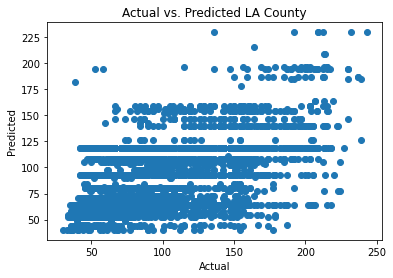

In [63]:
plt.scatter(y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted LA County')

In [43]:
#Repeat process with a different county
ny_df = master_df[(master_df.state_code ==36)&(master_df.county_code ==5)]
display(ny_df)

,usstate,county,city,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
25411,New York,Bronx,New York,2000-05-05,60.0,0.036,15.0,1.1,36,5,74
25412,New York,Bronx,New York,2000-05-06,82.0,0.065,26.0,2.1,36,5,96
25413,New York,Bronx,New York,2000-05-07,56.0,0.069,21.0,1.3,36,5,97
25414,New York,Bronx,New York,2000-05-08,87.0,0.057,26.0,1.2,36,5,98
25415,New York,Bronx,New York,2000-05-09,55.0,0.066,19.0,1.2,36,5,110
...,...,...,...,...,...,...,...,...,...,...,...
360947,New York,Bronx,New York,2009-12-27,38.0,0.029,17.6,1.0,36,5,36
360948,New York,Bronx,New York,2009-12-28,45.0,0.019,17.5,1.2,36,5,54
360949,New York,Bronx,New York,2009-12-29,21.0,0.030,10.5,0.9,36,5,46
360950,New York,Bronx,New York,2009-12-30,46.0,0.015,17.3,0.6,36,5,59


In [48]:
ny_df1 = ny_df.drop(columns=['usstate', 'county', 'city'])
display(ny_df1)

,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
25411,2000-05-05,60.0,0.036,15.0,1.1,36,5,74
25412,2000-05-06,82.0,0.065,26.0,2.1,36,5,96
25413,2000-05-07,56.0,0.069,21.0,1.3,36,5,97
25414,2000-05-08,87.0,0.057,26.0,1.2,36,5,98
25415,2000-05-09,55.0,0.066,19.0,1.2,36,5,110
...,...,...,...,...,...,...,...,...
360947,2009-12-27,38.0,0.029,17.6,1.0,36,5,36
360948,2009-12-28,45.0,0.019,17.5,1.2,36,5,54
360949,2009-12-29,21.0,0.030,10.5,0.9,36,5,46
360950,2009-12-30,46.0,0.015,17.3,0.6,36,5,59


In [49]:
ny_df1['local_date'] = ny_df1['local_date'].str.replace("-","")
display(ny_df1)

,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
25411,20000505,60.0,0.036,15.0,1.1,36,5,74
25412,20000506,82.0,0.065,26.0,2.1,36,5,96
25413,20000507,56.0,0.069,21.0,1.3,36,5,97
25414,20000508,87.0,0.057,26.0,1.2,36,5,98
25415,20000509,55.0,0.066,19.0,1.2,36,5,110
...,...,...,...,...,...,...,...,...
360947,20091227,38.0,0.029,17.6,1.0,36,5,36
360948,20091228,45.0,0.019,17.5,1.2,36,5,54
360949,20091229,21.0,0.030,10.5,0.9,36,5,46
360950,20091230,46.0,0.015,17.3,0.6,36,5,59


In [65]:
ny_df2 = ny_df1.astype({'local_date':'int'})
display(ny_df2)

,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,state_code,county_code,AQI
25411,20000505,60.0,0.036,15.0,1.1,36,5,74
25412,20000506,82.0,0.065,26.0,2.1,36,5,96
25413,20000507,56.0,0.069,21.0,1.3,36,5,97
25414,20000508,87.0,0.057,26.0,1.2,36,5,98
25415,20000509,55.0,0.066,19.0,1.2,36,5,110
...,...,...,...,...,...,...,...,...
360947,20091227,38.0,0.029,17.6,1.0,36,5,36
360948,20091228,45.0,0.019,17.5,1.2,36,5,54
360949,20091229,21.0,0.030,10.5,0.9,36,5,46
360950,20091230,46.0,0.015,17.3,0.6,36,5,59


In [66]:
#Separate clean dataframe into features and target variable 
X = ny_df2[['no2maxvalue', 'o3maxvalue', 'so2maxvalue', 'comaxvalue']]
y = ny_df2['AQI']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [68]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

ml = {
    "LinearRegression": LinearRegression(),
    "LogisticRegression":LogisticRegression()
}

model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
pred = model.predict(X_test)
mse = mean_squared_error(pred, y_test)
results = [{
            "Model": "LinearRegression",
            "Scaler": None,
            "Score":score,
            "MSE":mse,
            
        }]

for x in scalers:
    print(x)
    scaler = scalers[x].fit(X_train)
    x_train_scaled = scaler.transform(X_train)
    x_test_scaled = scaler.transform(X_test)
    
    for y in ml:
        model = ml[y]
        model.fit(x_train_scaled, y_train)
        score = model.score(x_test_scaled, y_test)
        pred = model.predict(x_test_scaled)
        mse = mean_squared_error(pred, y_test)
        results.append({
            "Model": y,
            "Scaler": x,
            "Score":score,
            "MSE":mse
        })
    

MinMaxScaler
StandardScaler


C:\Users\julia\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
pd.DataFrame(results)

,Model,Scaler,Score,MSE
0,LinearRegression,None,0.548030,210.913720
1,LinearRegression,MinMaxScaler,0.548030,210.913720
2,LogisticRegression,MinMaxScaler,0.048729,377.899718
3,LinearRegression,StandardScaler,0.548030,210.913720
4,LogisticRegression,StandardScaler,0.050847,209.913136


Text(0.5, 1.0, 'Actual vs. Predicted Bronx County')

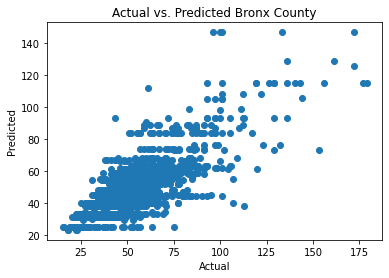

In [70]:
plt.scatter(y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Bronx County')